In [1]:
import pandas as pd
import numpy as np

from settings import *

df = pd.read_json(
    PATH_RECIPES_JSON,
    orient="records",
)
assert isinstance(df, pd.DataFrame)


In [2]:
df.shape


(149, 21)

In [3]:
sorted(list(df))


['clarity',
 'color',
 'color chrome effect',
 'color chrome effect blue',
 'date',
 'dynamic range',
 'exposure compensation',
 'grain effect',
 'highlight',
 'iso',
 'link',
 'name',
 'noise reduction',
 'p_html',
 'p_strings',
 'shadow',
 'sharpening',
 'sharpness',
 'simulation',
 'toning',
 'white balance']

# name

In [4]:
df.name = df.name.str.replace("’", "'")
df.name = df.name.str.replace("“", "")
df.name = df.name.str.replace("”", "")


# simulation

['eterna' 'acros' 'velvia' 'pro neg. std' 'astia' 'classic chrome'
 'pro neg. hi' 'provia' 'monochrome' 'acros+r' 'classic negative'
 'acros+g' 'monochrome+g' 'eterna bleach bypass' 'acros+y']


<AxesSubplot: >

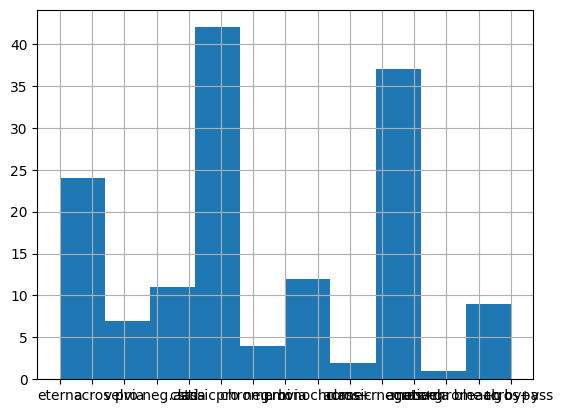

In [5]:
print(df.simulation.unique())
df.simulation.hist()


# sharpness

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


<AxesSubplot: >

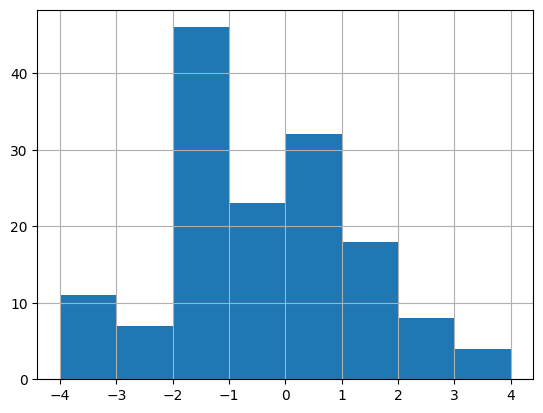

In [6]:
df.sharpness.fillna(df.sharpening, inplace=True)
df.sharpness.fillna(0, inplace=True)
df.drop(columns=["sharpening"], inplace=True)
print(sorted(df.sharpness.unique()))
df.sharpness.hist(bins=np.arange(-4, 5))


# clarity

[-5.0, -4.0, -3.0, -2.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


<AxesSubplot: >

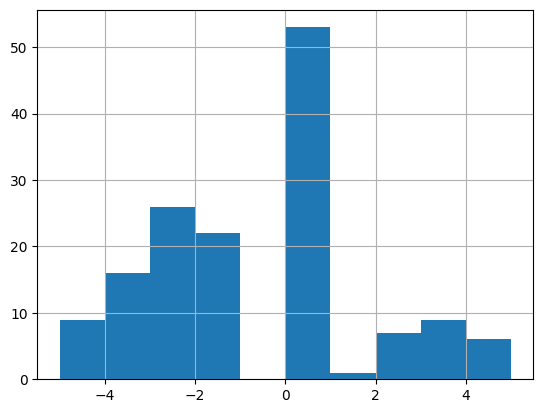

In [7]:
df.clarity.fillna(0, inplace=True)
print(sorted(df.clarity.unique()))
df.clarity.hist(bins=np.arange(-5, 6))


# noise reduction

[-4, -2, 2]


<AxesSubplot: >

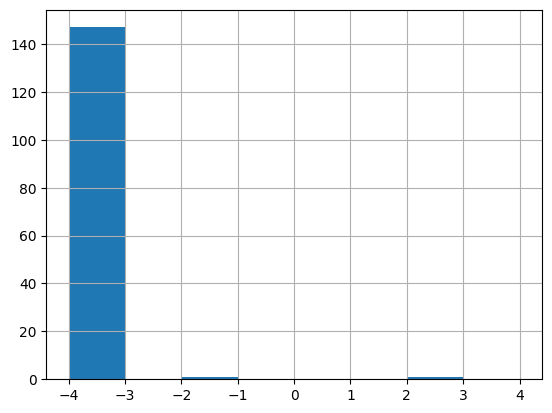

In [8]:
df["noise reduction"].fillna(0, inplace=True)
print(sorted(df["noise reduction"].unique()))
df["noise reduction"].hist(bins=np.arange(-4, 5))


# shadow

[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]


<AxesSubplot: >

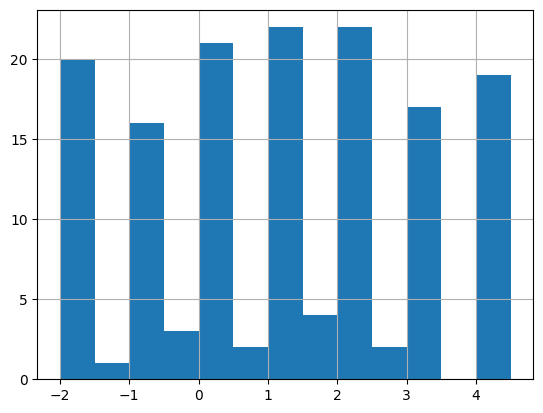

In [9]:
df.shadow.fillna(0, inplace=True)
print(sorted(df.shadow.unique()))
df.shadow.hist(bins=np.arange(-2, 5, 0.5))


# highlight

[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0, 3.0, 3.5, 4.0]


<AxesSubplot: >

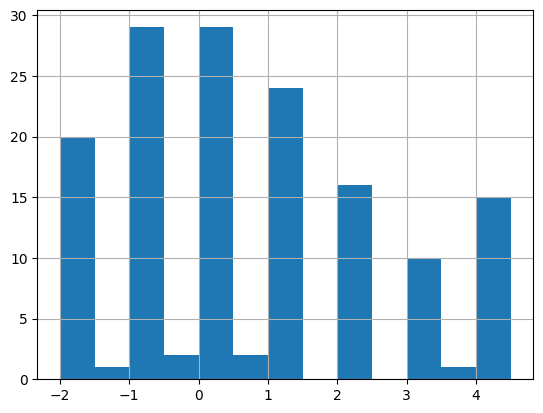

In [10]:
df.highlight.fillna(0, inplace=True)
print(sorted(df.highlight.unique()))
df.highlight.hist(bins=np.arange(-2, 5, 0.5))


# 

# color chrome effect blue

['off', 'strong', 'weak']


<AxesSubplot: >

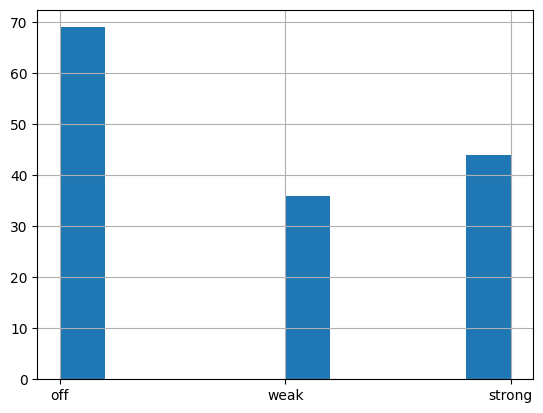

In [11]:
df["color chrome effect blue"].fillna("off", inplace=True)
print(sorted(df["color chrome effect blue"].unique()))
df["color chrome effect blue"].hist()


# color chrome effect

['weak' 'strong' 'off']


<AxesSubplot: >

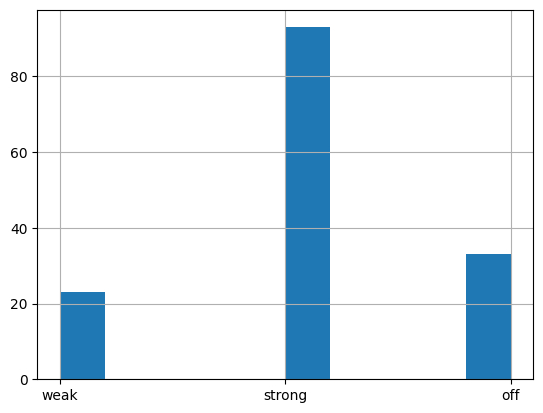

In [12]:
df["color chrome effect"].fillna("off", inplace=True)
df["color chrome effect"] = df["color chrome effect"].str.extract("(weak|strong|off)")
print(df["color chrome effect"].unique())
df["color chrome effect"].hist()


# grain effect

In [13]:
df["grain effect"].fillna("off", inplace=True)
print(sorted(df["grain effect"].unique()))


['off', 'strong', 'strong, large', 'strong, small', 'weak', 'weak, large', 'weak, small']


['off', 'strong', 'weak']


<AxesSubplot: >

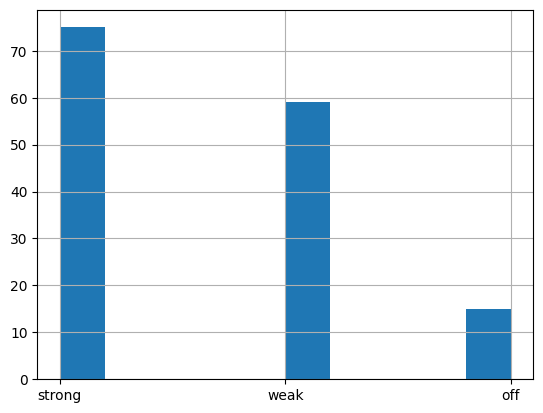

In [14]:
df["grain strength"] = df["grain effect"].str.extract("(weak|strong|off)")
print(sorted(df["grain strength"].unique()))
df["grain strength"].hist()


['large', 'off', 'small', 'small or large']


<AxesSubplot: >

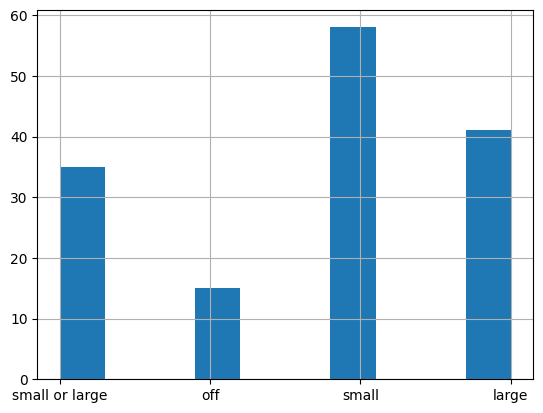

In [15]:
df["grain size"] = df["grain effect"].str.extract("(small|large|off)")
df["grain size"].fillna("small or large", inplace=True)
print(sorted(df["grain size"].unique()))
df["grain size"].hist()


# exposure compensation

In [16]:
df["exposure compensation"].fillna("0", inplace=True)
df.loc[df["exposure compensation"] == "", ["exposure compensation"]] = "0"
df["exposure compensation"] = df["exposure compensation"].str.replace(
    " (typically)", "", regex=False
)
df["exposure compensation"] = df["exposure compensation"].str.replace(
    "^0$", "0 to 0", regex=True
)
df["exposure compensation"] = df["exposure compensation"].str.replace(
    ",.*",
    "",
    regex=True,
)
print(sorted(df["exposure compensation"].unique()))


['+1 2/3 to +2 1/3', '+1 to +1 2/3', '+1 to +2', '+1/3', '+1/3 to +1', '+1/3 to +2/3', '+2/3 to + 1-1/3', '+2/3 to +1', '+2/3 to +1 1/3', '+2/3 to +1-1/3', '-1 to 0', '-1/3 to +1/3', '-1/3 to +2/3', '-1/3 to -1', '-1/3 to -2/3', '-2/3 to +1', '-2/3 to +2/3', '-2/3 to -1 1/3', '0 to +1', '0 to +1/3', '0 to +2/3', '0 to -1', '0 to -2/3', '0 to 0']


# dynamic range

['dr100' 'dr400' 'dr-auto' 'dr200' 'd-range priority auto'
 'd-range priority strong']


<AxesSubplot: >

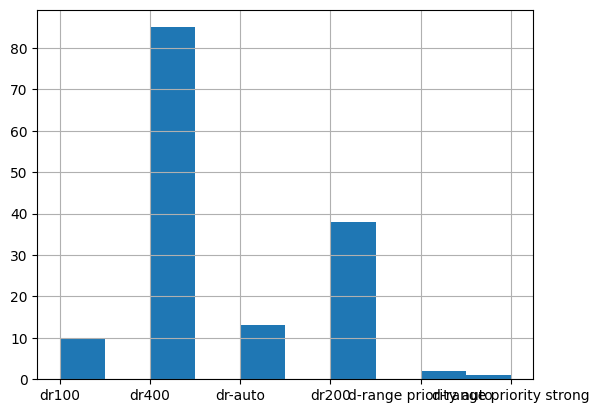

In [17]:
df.loc[df["dynamic range"] == "n/a", ["dynamic range"]] = "dr-auto"
df.loc[df["dynamic range"] == "", ["dynamic range"]] = "dr-auto"
df["dynamic range"].fillna("dr-auto", inplace=True)
df["dynamic range"] = df["dynamic range"].str.replace(
    "dr400 (dr200 in low contrast situations)", "dr400", regex=False
)
print(df["dynamic range"].unique())
df["dynamic range"].hist()


# iso

In [18]:
iso_map = {
    "auto up to iso 6400": "160 to 6400",
    "auto up to iso 12800": "160 to 12800",
    "25600 or 51200": "25600 to 51200",
    "nan": "160 to 6400",
    "auto, up to iso 6400": "160 to 6400",
    "auto, up to iso 3200": "160 to 3200",
    "auto, iso 3200 to iso 12800": "3200 to 12800",
    "auto, up to iso 12800": "160 to 12800",
    "3200 – 6400": "3200 to 6400",
    "iso 1600 – 12800": "1600 to 12800",
    "1600 to 6400": "1600 to 6400",
    "up to iso 5000": "160 to 6400",
    "auto, up to iso 1600": "160 to 1600",
    "auto, up to iso 6400 (for best results, try to limit the iso to 1600 and lower when able)": "160 to 6400",
    "3200": "3200 to 3200",
    "12800": "12800 to 12800",
}

df.iso = df.iso.replace(iso_map)
df.iso.fillna("160 to 6400", inplace=True)
print(sorted(df["iso"].unique()))


['12800 to 12800', '160 to 12800', '160 to 1600', '160 to 3200', '160 to 6400', '1600 to 12800', '1600 to 6400', '25600 to 51200', '3200 to 12800', '3200 to 3200', '3200 to 6400']


# white balance

In [19]:
df["white balance"].fillna("auto, 0 red & 0 blue", inplace=True)
wb_map_comma = {
    "auto (use a shift on the second exposure)": "auto, 0 red & 0 blue",
    "auto": "auto, 0 red & 0 blue",
    "auto white priority": "auto white priority, 0 red & 0 blue",
}
df["white balance"] = df["white balance"].replace(wb_map_comma)
# print(df["white balance"].unique())


In [20]:
df["wb"] = df["white balance"].str.split(",").str[0]
wb_map_clean = {
    "awb": "auto",
    "cloudy/shade": "shade",
    "daylight fluorescent (1)": "fluorescent 1",
    "fluorescent 1 (daylight fluorescent)": "fluorescent 1",
    "fluorescent 3 (cool white fluorescent)": "fluorescent 3",
    "fluorescent 3 (“cool white fluorescent”)": "fluorescent 3",
    "warm-white fluorescent (2)": "fluorescent 2",
}
df.wb = df.wb.replace(wb_map_clean)
print(sorted(df.wb.unique()))


['10000k', '2500k', '2650k', '2750k', '2900k', '2950k', '3200k', '4300k', '4550k', '4700k', '4800k', '4900k', '5000k', '5100k', '5200k', '5250k', '5300k', '5500k', '5600k', '5800k', '5900k', '6050k', '6300k', '6700k', '6800k', '6900k', '6990k', '7000k', '7100k', '7300k', '7350k', '7700k', '8300k', '8700k', '9100k', 'auto', 'auto ambience priority', 'auto white priority', 'daylight', 'fluorescent 1', 'fluorescent 2', 'fluorescent 3', 'incandescent', 'shade']


In [21]:
df["wb shift red"] = df["white balance"].str.extract("(-?\+?\d)\s+red", expand=True)
df["wb shift blue"] = df["white balance"].str.extract("(-?\+?\d)\s+blue", expand=True)
print(sorted(df["wb shift red"].unique()))
print(sorted(df["wb shift blue"].unique()))


['+1', '+2', '+3', '+4', '+5', '+6', '+7', '+8', '+9', '-1', '-2', '-3', '-4', '-5', '-6', '-7', '-8', '-9', '0']
['+1', '+2', '+3', '+4', '+5', '+6', '+7', '+8', '+9', '-0', '-1', '-2', '-3', '-4', '-5', '-6', '-7', '-8', '-9', '0']


# toning and monochromatic color

In [22]:
df["toning"].fillna("0", inplace=True)

has_mc = df["toning"].str.contains("wc")

df["monochromatic wc"] = df[has_mc]["toning"].str.extract("wc\s+\+?(-?\d)", expand=True)
df["monochromatic wc"].fillna("0", inplace=True)
print(df["monochromatic wc"].unique())

df["monochromatic mg"] = df[has_mc]["toning"].str.extract("mg\s+\+?(-?\d)", expand=True)
df["monochromatic mg"].fillna("0", inplace=True)
print(df["monochromatic mg"].unique())

df["toning"] = df["toning"].str.extract("^\+?(-?\d)", expand=True)
df["toning"].fillna("0", inplace=True)
print(df["toning"].unique())


['0' '2' '1']
['0']
['0' '1' '-9']


# color

[-4, -3, -2, -1, 0, 1, 2, 3, 4]


<AxesSubplot: >

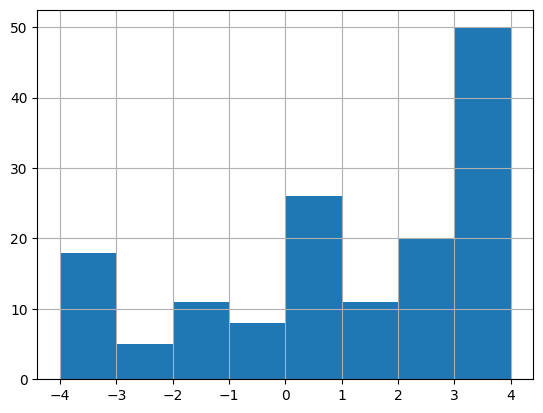

In [23]:
df.color.fillna(0, inplace=True)
df.color = df.color.astype("int")
print(sorted(df.color.unique()))
df.color.hist(bins=np.arange(-4, 5))


# organize

In [24]:
df = df.sort_values(by="date", ascending=False)

df["id"] = df.date.astype(str) + "__" + df.name

df = df.astype(
    {
        "toning": int,
        "monochromatic wc": int,
        "monochromatic mg": int,
        "wb shift red": int,
        "wb shift blue": int,
        "color": int,
        "sharpness": int,
        "noise reduction": int,
        "clarity": int,
    }
)

recipe_fields = [
    "simulation",
    "toning",
    "monochromatic wc",
    "monochromatic mg",
    "grain strength",
    "grain size",
    "color chrome effect",
    "color chrome effect blue",
    "wb",
    "wb shift red",
    "wb shift blue",
    "dynamic range",
    "highlight",
    "shadow",
    "color",
    "sharpness",
    "noise reduction",
    "clarity",
    "iso",
    "exposure compensation",
]


def gen_recipe_long(row):
    value = ""
    for rf in recipe_fields:
        value += f"{rf}: {row[rf]}\n"
    return value.strip()


def gen_recipe_short(row):
    value = ""
    value += f'simulation: {row["simulation"]}\n'

    if int(row["toning"]) != 0:
        value += f'toning: {row["toning"]}\n'
    elif int(row["monochromatic wc"]) != 0 or int(row["monochromatic mg"]) != 0:
        value += (
            f'mono wc: {row["monochromatic wc"]}, mono mg: {row["monochromatic mg"]}\n'
        )

    if row["grain strength"] != "off":
        value += f'grain: {row["grain strength"]}, {row["grain size"]}\n'

    if row["color chrome effect"] != "off":
        value += f'color chrome effect: {row["color chrome effect"]}\n'

    if row["color chrome effect blue"] != "off":
        value += f'color chrome effect blue: {row["color chrome effect blue"]}\n'

    value += f'wb: {row["wb"]}\n'
    value += f'wb shift: {row["wb shift red"]} red, {row["wb shift blue"]} blue\n'

    props = [
        "dynamic range",
        "highlight",
        "shadow",
        "color",
        "sharpness",
        "noise reduction",
        "clarity",
        "iso",
        "exposure compensation",
    ]
    for rf in props:
        try:
            if row[rf] == "" or float(row[rf]) == 0:
                continue
            value += f"{rf}: {row[rf]}\n"
        except:
            value += f"{rf}: {row[rf]}\n"

    return value.strip()


df["recipe long"] = df.apply(gen_recipe_long, axis=1)
df["recipe short"] = df.apply(gen_recipe_short, axis=1)

df_recipes_long = df[["id", "recipe long"]]
df_recipes_short = df[["id", "recipe short"]]
df_recipes_table = df[
    [
        "id",
        "date",
        "name",
        *recipe_fields,
        "link",
    ]
]


# export

In [25]:
df_recipes_long.to_csv(PATH_RECIPES_LONG_CSV, index=False)
df_recipes_short.to_csv(PATH_RECIPES_SHORT_CSV, index=False)
df_recipes_table.to_csv(PATH_RECIPES_TABLE_CSV, index=False)
